<br><br><br><br>

<font size="4">
2 main function : cv2.getPerspectiveTransform and then cv2.warpPerspective 
     
</font><br>

<font size="4">
cv2.getPerspectiveTransform(src, dst) :

* src: Coordinates of quadrangle vertices in the source image.
* dst: Coordinates of the corresponding quadrangle vertices in the destination image.

<br>

cv2.warpPerspective(src, dst, dsize) : 
* src: Source Image
* dst: output image that has the size dsize and the same type as src.
* dsize: size of output image
</font>







In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

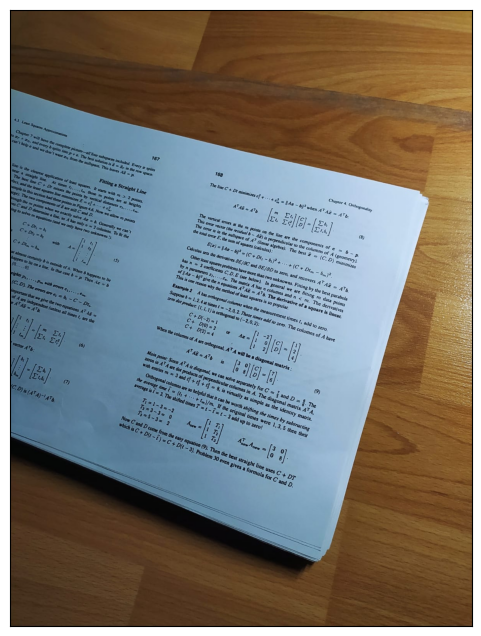

In [21]:
image = cv2.imread(r"images/book_page.jpeg")

rgb_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.xticks([]), plt.yticks([])
plt.imshow(rgb_image)

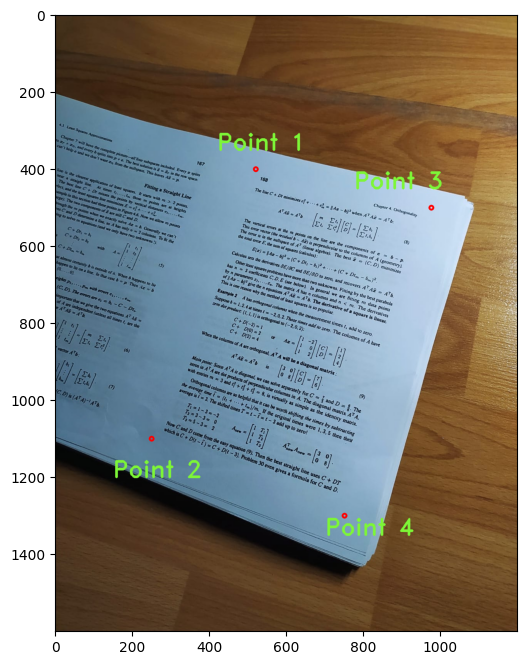

In [23]:

pt1=[520,400]
pt2=[250,1100]
pt3= [975,500]
pt4=[750,1300]

cv2.circle(rgb_image, pt1, 5, (255,0,0), 3)
cv2.circle(rgb_image, pt2, 5, (255,0,0), 3)
cv2.circle(rgb_image, pt3, 5, (255,0,0), 3)
cv2.circle(rgb_image, pt4, 5, (255,0,0), 3)

cv2.putText(img = rgb_image,text = "Point 1",org = (pt1[0]-100, pt1[1]-50),fontFace = cv2.FONT_HERSHEY_DUPLEX,fontScale = 2.0,color = (125, 246, 55),thickness = 3)
cv2.putText(img = rgb_image,text = "Point 2",org = (pt2[0]-100, pt2[1]+100),fontFace = cv2.FONT_HERSHEY_DUPLEX,fontScale = 2.0,color = (125, 246, 55),thickness = 3)
cv2.putText(img = rgb_image,text = "Point 3",org = (pt3[0]-200, pt3[1]-50),fontFace = cv2.FONT_HERSHEY_DUPLEX,fontScale = 2.0,color = (125, 246, 55),thickness = 3)
cv2.putText(img = rgb_image,text = "Point 4",org = (pt4[0]-50, pt4[1]+50),fontFace = cv2.FONT_HERSHEY_DUPLEX,fontScale = 2.0,color = (125, 246, 55),thickness = 3)


plt.figure(figsize=(12,8))
plt.imshow(rgb_image)

<br><br><br>

In [15]:

height_1 = np.sqrt(((pt1[0] - pt2[0]) ** 2) + ((pt1[1] - pt2[1]) ** 2))
height_2 = np.sqrt(((pt3[0] - pt4[0]) ** 2) + ((pt3[1] - pt4[1]) ** 2))

width_1 = np.sqrt(((pt1[0] - pt3[0]) ** 2) + ((pt1[1] - pt3[1]) ** 2))
width_2 = np.sqrt(((pt2[0] - pt4[0]) ** 2) + ((pt2[1] - pt4[1]) ** 2))

In [16]:
max_height=max(int(height_1), int(height_2))
max_width = max(int(width_1), int(width_2))
print(max_height,max_width)

831 538


In [17]:
output_pts = np.float32([[0, 0],
                        [0, max_width],
                        [max_height , 0],
                        [max_height , max_width]])

input_pts=np.float32([pt1,pt2,pt3,pt4])

In [18]:
# Compute the perspective transform M
M = cv2.getPerspectiveTransform(input_pts,output_pts)
M

array([[ 2.30544157e+00,  8.89241747e-01, -1.55452631e+03],
       [-2.22879024e-01,  1.01409956e+00, -2.89742731e+02],
       [ 2.01148826e-04,  3.46388157e-04,  1.00000000e+00]])

In [19]:
out = cv2.warpPerspective(rgb_image,M,(max_height, max_width),flags=cv2.INTER_LINEAR)

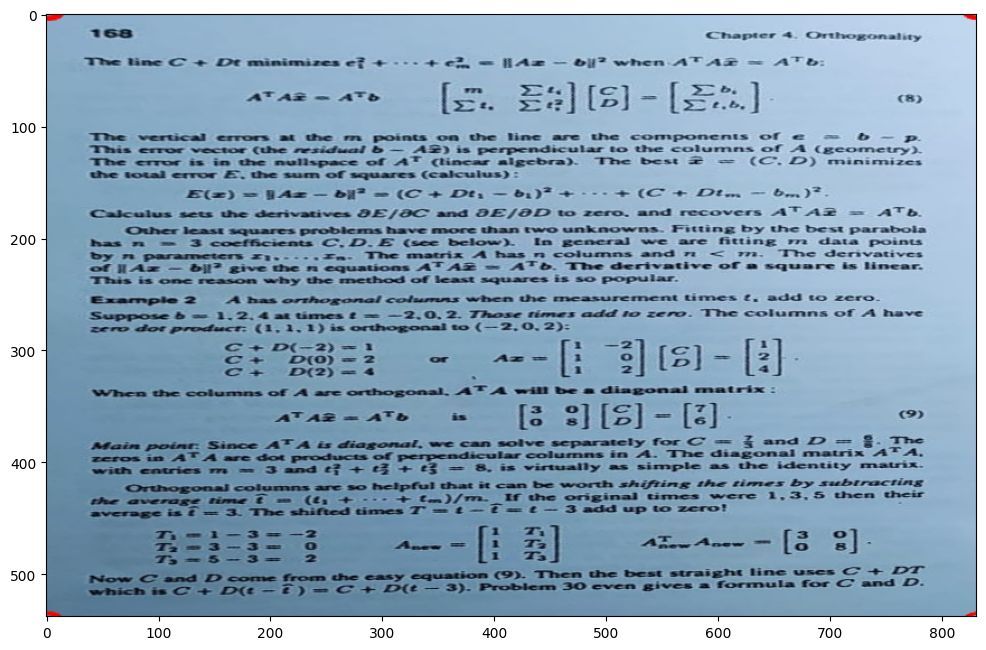

In [20]:
plt.figure(figsize=(12,15))
plt.imshow(out)
plt.imsave("result.png",out)